# Best Fitting through Linear Regression and Gradient Descent
# Dawson Dolansky
# Math 248



## Background on Training Models
It is numerically finding the modelling function that best fits our data set, through some ***iterative method that trains variables***.

What are these variables we want to train? Training models find the parameters that minimize the "cost" of finding the parameters. Similar to interpolation discussed last week, we are trying to find parameters so that we fit some data set correctly.



The most basic understanding in training models lies in the Linear Regression Model. Furthermore, we can break down the linear regression model into a direct or numerical iterating solution. For instance, you may know about the analytical solution of solving the linear regression parameters. The numerical iterating solution is found the Gradient Descent.

If we have time, I will discuss shortly Polynomial Regression, a unique complex model for non-linear datasets.

## Direct Solution (Linear Regression)

Similar in a sense to interpolation, we are using a linear combination of the individual elements in the combination of a weight vector (b) and a directional vector for our data sets (V): 
### $$Vb = y$$
### $$Xb = y$$

The Linear Regression Model utilizes this idea, with a linear combination/dot product of a weight vector and directional vector. Our weights are referred to the model parameters ($\theta = b$), because they define the amount of weight we put upon any vector, and our directional vector is referred to the feature vector ($X = V$), because it describes the features of the individual dataset. 

Even more so, this Linear Regression Model represents a function in the same way as the interpolating function. Mathematically, we can say that our linear regression model represents a *hypothesis function* given the weights we provide: 
### $$h_\theta(x) = \theta_0+\theta_1x_1 + ... + \theta_nx_n$$

Where we can simply restate it in our vectorized form as, with an added bias term $\theta_0$:

### $$h_\theta(x) = \begin{bmatrix} \theta_1 \\ \theta_2 \\ ... \\ \theta_n \\ \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_n \\ \end{bmatrix}$$

### $$h_\theta(x) = \theta*x$$

For my purposes, I will analyze the linear equations

### $$h_\theta(x) = \theta_0 + \theta_1*x_1, x_0 = 1$$
 $$y = mx + b$$

When training the data set with linear regression, we want to find the mean squared error that shows our deviation from best fitting function to our data set. If this error is found to be large, we will revise and do it again!

### The Mean Squared Error Equation: 
### $$ MSE(X, h_\theta)=\frac{1}{m}\sum^m_{i+1}(\theta^Tx^{(i)}-y^{(i)})^2$$
We manipulate our mean squared error to fit our parameterization by $\theta$.

From a scientific standpoint, we can describe it easily using independent and dependent errors in a lab.
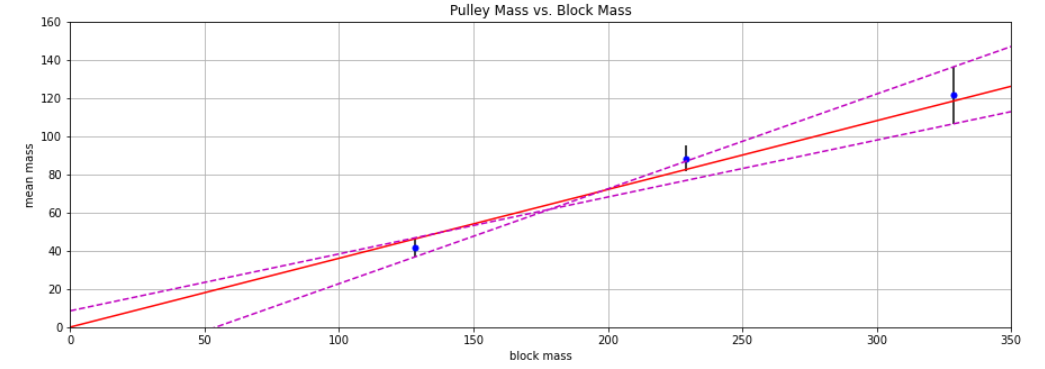
![Error_Graph.jpg](Demonstration of Error)

### Normal Equation
Now that we know much about the tools of linear regression, lets start to analyze some data set and train it. First, we must start with a normal equation, which allows us to find a closed-form solution of the parameters $(\theta)$ that minimize our function. We define this equation: 

### $$\theta = (X^TX)^{-1}X^T y$$
### $$\theta = h_\theta(x) * x $$
### So, $$(X^TX)^{-1}X^T y = x * h_\theta(x)^t$$

A notable attribute of this equation is that we are providing a dot product of the pseudo inverse and our y vector in order to manipulate and expose the value of $\theta$ given a target values of y.

$$\theta = (X^TX)^{-1}X^T y = X^+ y$$

39.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


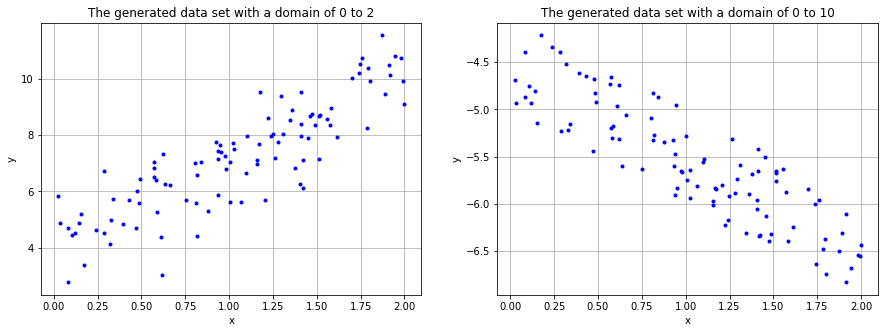

In [10]:
%%timeit -r 1 -n 1

import numpy as np
import matplotlib.pyplot as plt

x1 = 2 * np.random.rand(100, 1) # Creates a random value between 0 and 1

# Our function, h(x) = 4 + 3x, that we want to replicate. We have a binomial and a random distrbiution
y1 = 4 + 3 * x1 + np.random.randn(100, 1)

y2 = -5 + -1 * x1 + np.random.rand(100, 1)

# Adding a normal distribution of random values to our function to demonstrate a data set

# Plotting
fig, sub1 = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sub1[0].plot(x1, y1, 'b.')
sub1[1].plot(x1, y2, 'b.')
sub1[0].set_xlabel('x')
sub1[1].set_xlabel('x')
sub1[0].set_ylabel('y')
sub1[1].set_ylabel('y')
sub1[0].set_title("The generated data set with a domain of 0 to 2")
sub1[1].set_title("The generated data set with a domain of 0 to 10")
sub1[0].grid()
sub1[1].grid()

To solve the closed-form solution, we manipulate our data set (X) as shown below. The main goal is to replicate the parameters of $\theta$ with a bias $\theta_0 = 4$ and $\theta_1 = 3$.

Our theta min:
 [[4.06659743]
 [2.89964672]]
Our theta min:
 [[-4.51474201]
 [-1.03204303]]
Our hypothesis function:
 h0(x) = 4.07 + 2.90x1
Our hypothesis function:
 h0(x) = -4.51 + -1.03x1
40.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


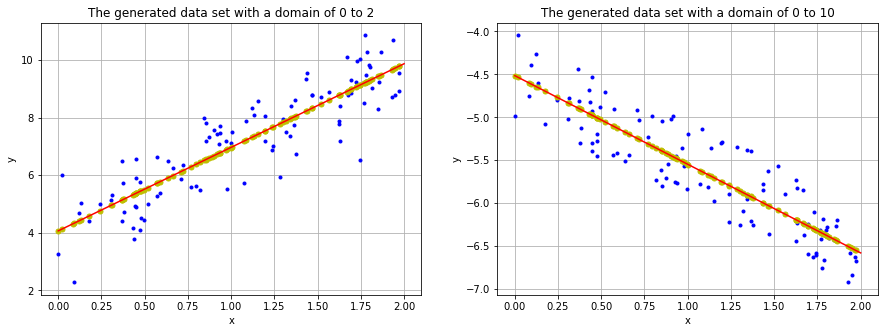

In [13]:
%%timeit -r 1 -n 1
# Here, we are making a one dimensional vector of the data set domain
x1_linear = np.c_[np.ones((100, 1)), x1]

# Finding the value of theta that minimizes the cost function.
# theta = (xTx)^-1 * xt * y
theta_min1 = np.linalg.inv(x1_linear.T.dot(x1_linear)).dot(x1_linear.T).dot(y1)
theta_min2 = np.linalg.inv(x1_linear.T.dot(x1_linear)).dot(x1_linear.T).dot(y2)

# With this, we can simply state our predicted y-hat as the dot product of the theta vector with the feature vector x...
# theta0 + theta1 * x1 = y-hat = hypothesis function
print("Our theta min:\n", theta_min1)
print("Our theta min:\n", theta_min2)


# On the other hand, we can analytically prove this through the dot product of the x vector with the theta vector using python
# Predicting y-hat from our minimized theta with the bias. Furthermore, we utilize y-hat = theta_vector * x_vector
x_new1 = np.array([[0], [2]]) # Our 0 to 2 x values
x_new_b1 = np.c_[np.ones((2, 1)), x_new1] # our bias being added
y_predict1 = x_new_b1.dot(theta_min1)
y_predict2 = x_new_b1.dot(theta_min2)

print("Our hypothesis function:\n h0(x) = %.2f" % theta_min1[0], "+ %.2fx1" % theta_min1[1])
print("Our hypothesis function:\n h0(x) = %.2f" % theta_min2[0], "+ %.2fx1" % theta_min2[1])

# Plotting
fig, sub2 = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
sub2[0].plot(x1, y1, 'b.')
sub2[1].plot(x1, y2, 'b.')
sub2[0].plot(x1, theta_min1[0] + theta_min1[1] * x1, 'y.', markersize=10)
sub2[1].plot(x1, theta_min2[0] + theta_min2[1] * x1, 'y.', markersize=10)
sub2[0].plot(x_new1, y_predict1, 'r-')
sub2[1].plot(x_new1, y_predict2, 'r-')
sub2[0].set_xlabel('x')
sub2[1].set_xlabel('x')
sub2[0].set_ylabel('y')
sub2[1].set_ylabel('y')
sub2[0].set_title("The generated data set with a domain of 0 to 2")
sub2[1].set_title("The generated data set with a domain of 0 to 10")
sub2[0].grid()
sub2[1].grid()

As you can see, our best fitting polynomial was found to be precise to some extent. If we want to calculate the error of our function, to see if we want to minimize or not our function again, we can use the mean squared error. This minimization will be of our cost function, the theta function we calculate earlier. 

***Furthermore, we can minimize the time spent doing this through the python library scikit learn.***


Solutions through scikit_learn:
Bias: 4.07
Coefficient/Slope: 2.90
y_hat:
 [[4.06659743]
 [9.86589087]]

Analytical Closed Form Solutions:
Bias: 4.07
Coefficient/Slope: 2.90
y_hat:
 [[4.06659743]
 [9.86589087]]
28.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


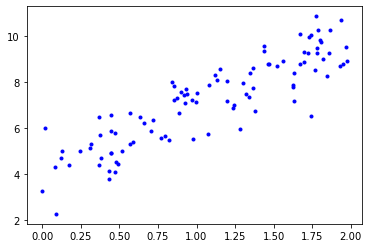

In [20]:
%%timeit -r 1 -n 1
from sklearn.linear_model import LinearRegression
x1_linear = np.c_[np.ones((100, 1)), x1]
theta_min1 = np.linalg.inv(x1_linear.T.dot(x1_linear)).dot(x1_linear.T).dot(y1)
x_new1 = np.array([[0], [2]]) # Our 0 to 2 x values
x_new_b1 = np.c_[np.ones((2, 1)), x_new1] # our bias being added
y_predict1 = x_new_b1.dot(theta_min1)
lin_reg = LinearRegression()
lin_reg.fit(x1, y1)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(x_new1)

print("Solutions through scikit_learn:")
print("Bias: %.2f" % lin_reg.intercept_)
print("Coefficient/Slope: %.2f" % lin_reg.coef_)
print("y_hat:\n", lin_reg.predict(x_new1))

print()

print("Analytical Closed Form Solutions:")
print("Bias: %.2f" % theta_min1[0])
print("Coefficient/Slope: %.2f" % theta_min1[1])
print("y_hat:\n", y_predict1)

plt.plot(x1, y1, 'b.')

**Even more so, we can reduce the amount of time spent coding by utilizing the basic idea that our dot product of the pseudoinverse of X (Which we looked at with SVD) and the y vector will represent our best fitting theta to minimize the cost function***

In [22]:
# Our only 4 lines of code
x = 2 * np.random.rand(100, 1)
y = 4 + 3*x + np.random.randn(100, 1)

x_b = np.c_[np.ones((100, 1)), x] # adding xo to each instance

theta = np.linalg.pinv(x_b).dot(y)

# Iterative Approach (Gradient Descent)
Now we look at an iterative approach, through gradient descent. Using the basic components of Linear Regression, we can minimize the error function, our cost function, by looking at the slope (gradient). This, with a weight (learning rate) in the slope, allows us to find the best fitting function numerically.

 $$ MSE(X, h_\theta)=\frac{1}{m}\sum^m_{i+1}(\theta^Tx^{(i)}-y^{(i)})^2$$

$$ \Delta MSE(X, h_\theta)=\frac{2}{m}\sum^m_{i+1}(\theta X-y)X^t$$

$$\theta_{next} = \theta - n * \Delta MSE(X, h_\theta)$$


#### Gradient Descent is...
1. Fast to compute (depending on the data set)
2. Decreases memory used
3. Allows a larger number of feature parameters, x


65.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


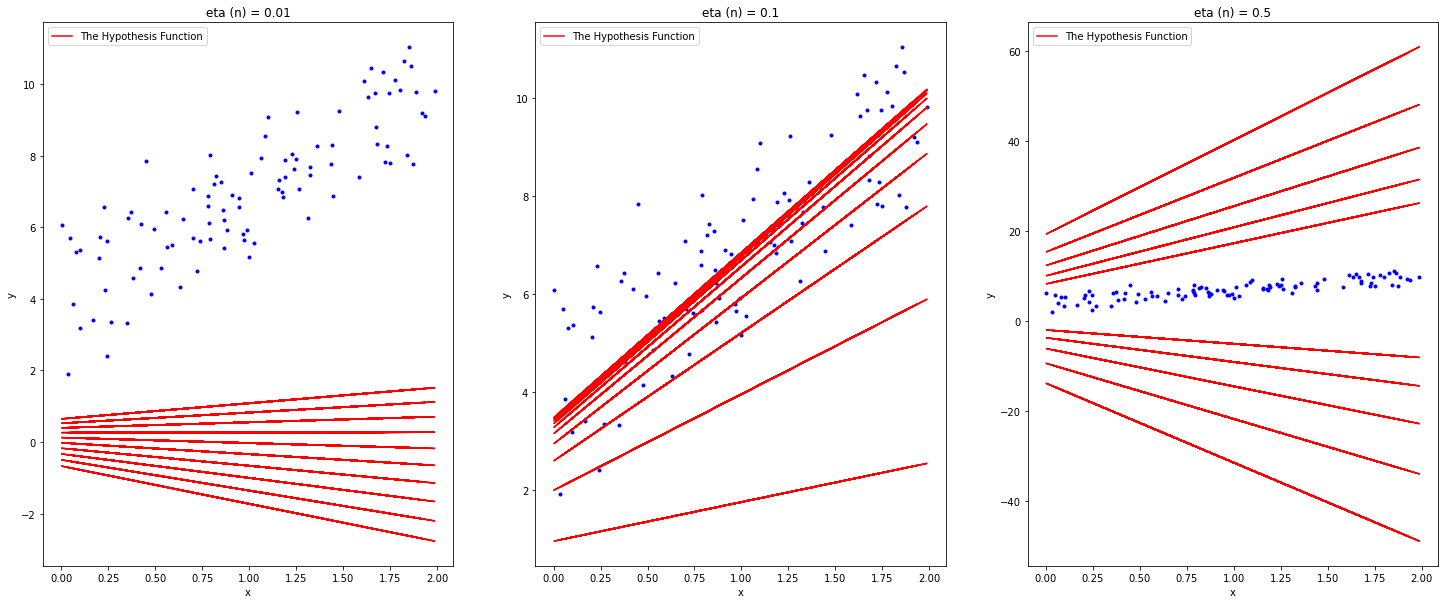

In [25]:
%%timeit -r 1 -n 1
eta = [0.01, 0.1, .5] 
n_iterations = 10 # the amount of iterations toward our minimization
m = 100

fig, sub3 = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 10))

# Plotting format
for i in range(3):
    sub3[i].set_xlabel("x")
    sub3[i].set_ylabel("y")
    sub3[i].plot(x, y, 'b.')


theta = np.random.randn(2, 1)
theta= [np.copy(theta), np.copy(theta), np.copy(theta)] 

for iteration in range(n_iterations):
    for i in range(3):
        gradientStep = 2/m * x_b.T.dot(x_b.dot(theta[i])-y) # Calculating that gradient
        theta[i] -= eta[i] * gradientStep # Our step through our gradient
        sub3[i].plot(x, theta[i][0] + theta[i][1]*x, 'r-')
        sub3[i].set_title(f"eta (n) = {eta[i]}")
        
    if (iteration == 9):
        for i in range(3):
            sub3[i].plot(x, theta[i][0] + theta[i][1]*x, 'r-', label = "The Hypothesis Function")
for i in range(3):
    sub3[i].legend(loc ="upper left")

#### What if we increase the data set
Now we have to take into account that this method, the batch gradient descent method for a best fitting function, uses the whole entire data set (as is evident by the dot product of the vectors). This can be slow, as seen below using an expansion to $1000000$ data values, with a linear data set.

1.81 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


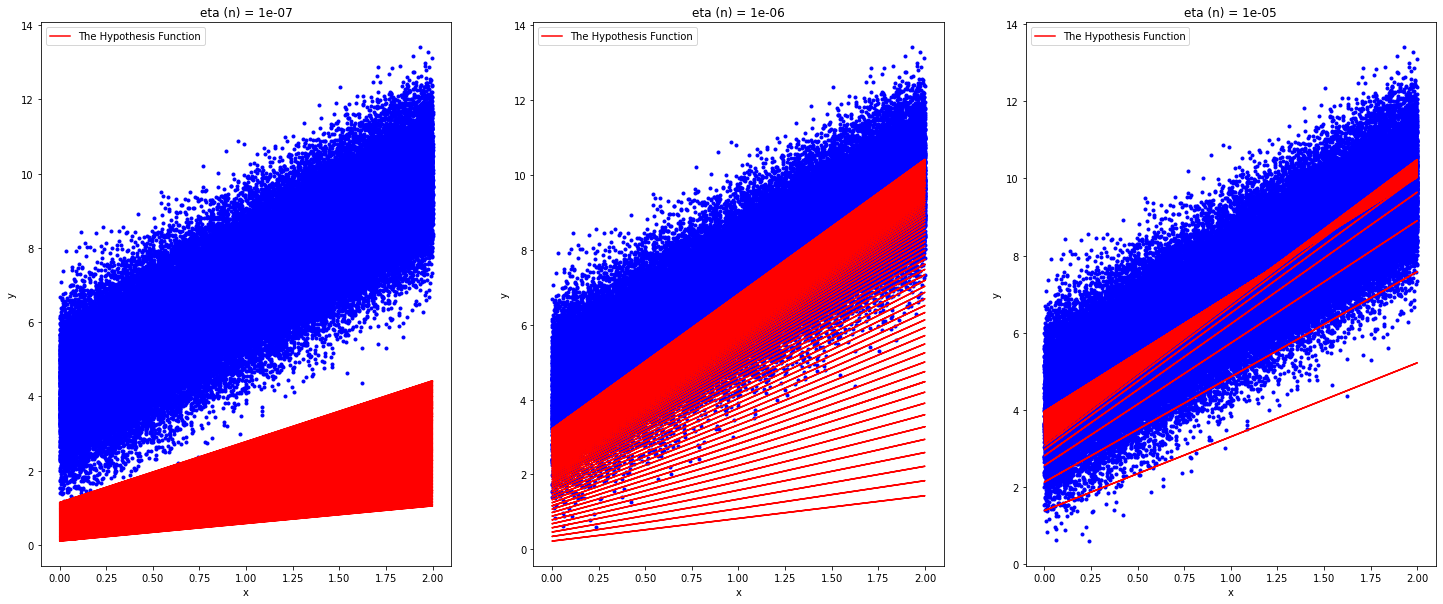

In [28]:
%%timeit -r 1 -n 1
import numpy as np
# Our only 4 lines of code
x = 2 * np.random.rand(100000, 1)
y = 4 + 3*x + np.random.randn(100000, 1)

eta = [0.0000001, 0.000001, .00001] 
n_iterations = 100 # the amount of iterations toward our minimization
m = 10

fig, sub3 = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 10))

# Plotting format
for i in range(3):
    sub3[i].set_xlabel("x")
    sub3[i].set_ylabel("y")
    sub3[i].plot(x, y, 'b.')


x_b = np.c_[np.ones((100000, 1)), x] # adding xo to each instance
theta = np.random.randn(2, 1)

thetaArray = [np.copy(theta), np.copy(theta), np.copy(theta)] 

for iteration in range(n_iterations):
    for i in range(3):
        gradientStep = 2/m * x_b.T.dot(x_b.dot(thetaArray[i])-y) # Calculating that gradient
        thetaArray[i] -= eta[i] * gradientStep # Our step through our gradient
        sub3[i].plot(x, thetaArray[i][0] + thetaArray[i][1]*x, 'r-')
        sub3[i].set_title(f"eta (n) = {eta[i]}")
        
    if (iteration == 9):
        for i in range(3):
            sub3[i].plot(x, thetaArray[i][0] + thetaArray[i][1]*x, 'r-', label = "The Hypothesis Function")
for i in range(3):
    sub3[i].legend(loc ="upper left")

So how do we manipulate the data set to still find a minimized cost function? We take guesses, find their gradients, and find the next guess in the area of that gradient.

This is stochastic gradient descent.

## Stochastic Gradient Descent

### The steps
#### 1. Start off with a random data point, and take a large step (large eta learning rate)
#### 2. From our last step, we decrease the learning rate and take another step
#### 3. Eventually we will arrive within the area where we maintain an average mean squared error (MSE).

As an analogy, we can compare the Stochastic Gradient Descent to a hole in golf. We start off with the driver (far hit), land closer to our hole (our next data point), and from analysis of the cost function we adjust the size of the club we use for the next hit (adjust the learning rate appropiately).

![image](golfpath.jpg) ![image](golfpath1.jpg) Credit to Golf.com

[[3.91690867]
 [2.6625116 ]]
78.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


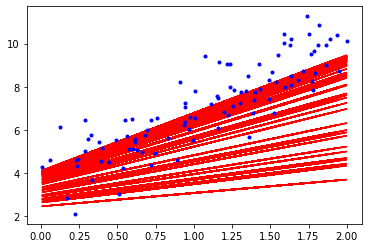

In [29]:
%%timeit -r 1 -n 1
n_epochs = 10 # number of steps
t0, t1 = 1, 50# learning schedule hyperparameters

def learning_schedule(t): # returns an eta learning rate value for each step
    return t0/(t+t1)

# Domain and Target Range
x = 2 * np.random.rand(100, 1)
y = 4 + 3*x + np.random.randn(100, 1)

theta = np.random.randn(2, 1)
x_b = np.c_[np.ones((100, 1)), x]

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradientStep = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta -= eta * gradientStep
        plt.plot(x, theta[0] + theta[1]*x, 'r-')
print(theta)
plt.plot(x, y, 'b.')

With our Stochastic Gradient Descent of this data set, we have a similar amount of time spent coding.

Like we had learned in linear regression, libraries exist to lessen the time spent coding these algorithms. From scikit_learn, we can do linear regression by stochastic gradient descent (SGD)

In [30]:
%%timeit -r 1 -n 1
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

# Our theta solutions
print("bias: ", sgd_reg.intercept_)
print("slope: ", sgd_reg.coef_)

bias:  [4.10688228]
slope:  [2.94843978]
15.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


As we can see, with the library we reduce our time spent running the code threefold.

### Combining Gradient Descent methods:
#### Stochastic Gradient Descent + Batch Gradient Descent = mini-batch gradient descent

This method, mini-batch gradient descent, combines the two. As the name infers, we take a some random data from the batch, compute a gradient from the chosen set, advance to the next random batch, and repeat. Eventually, we arrive to a minimization that goes back in forth similarily to that of the stochastic gradient descent.

Due to lack of time spent studying the material to visualize it using python, I will provide a visual that describes, courtesy of O'Reilly.

![O'Reilly.png](O'Reilly.png)

# What I perfected the presentation on after the Presentations
After my presentation, I had added the measure of time of each code sample, to show how different the methods are in time spent computing. I found that with small data sets, the time difference was not as large as expected, but with larger data sets this could become more apparent. Important observations include the huge amount of time spent visuallizing and fitting the large data set, and the drastically reduced amount of time spent computing the fit for the library.

Dawson Dolansky